In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Domestic', 'Government', min_assets=.8)
equities = screen_funds('Equities', 'Domestic', 'Large-Cap', min_assets=.8)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

22 92
from 2019-05-28 to 2019-07-12 - 114


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

114


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
QQQ,28,1.722207,2.015626,0.834740,9.278200,4.152357
ONEQ,28,1.621077,1.827992,0.865099,8.540499,3.758269
FTC,28,1.587253,1.786815,0.866106,8.998106,2.299020
MGK,28,1.571143,1.793313,0.853984,8.588386,3.512876
JKE,28,1.566425,1.752719,0.871070,8.375256,3.511357
IWY,28,1.560415,1.775627,0.856448,8.506516,3.272679
VUG,28,1.554414,1.730183,0.875475,8.646720,3.091531
SCHG,28,1.550970,1.620206,0.932775,8.709717,2.877697
VONG,28,1.548714,1.732746,0.870890,8.635297,2.872116


{'RWL': 0.274, 'TIP': 0.416, 'VLUE': 0.31} 0.962


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,28.0,0.962730,0.752471,-0.177086,0.356537,1.073023,1.408094,2.936100,1.226689,5.803104,1.014222
VLUE,28.0,1.533484,1.302510,-0.302819,0.563716,1.467547,1.969697,4.888826,1.146864,8.786332,2.786458
RWL,28.0,1.462015,1.322453,-0.514804,0.543542,1.214345,1.885963,4.906872,1.075526,8.420626,2.280769
TIP,28.0,0.207656,0.568634,-0.738290,-0.264050,0.139130,0.679195,1.297565,0.295398,1.855984,0.929385


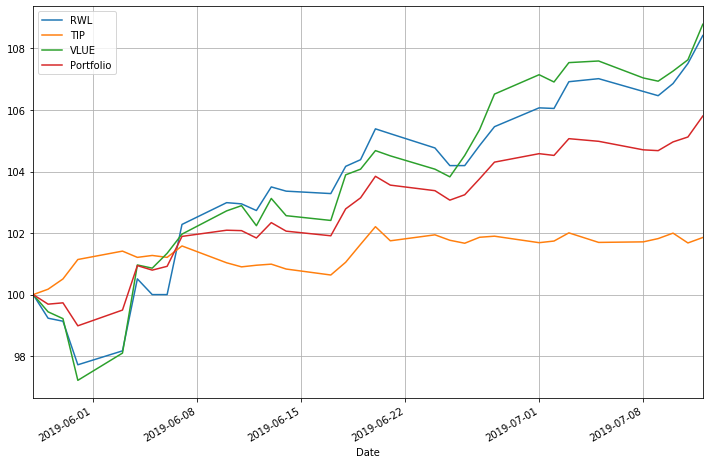

In [4]:
quote.setup_mask(['RWL', 'TIP', 'VLUE'])
ratio, mean, *_ = quote.find_optimal_ratio()
print(ratio, mean)
quote.graph(ratio)

evicted VMBS 0.856 -0.045
evicted RDIV 0.889 0.110
evicted TILT 0.896 0.059
evicted USMV 0.882 0.067
evicted CET 0.852 -0.070
evicted JKE 0.865 -0.186
evicted EDV 0.496 -0.099
evicted RPV 0.887 0.104
evicted IPE 0.729 -0.118
retry backlogs ['SDY', 'LRGF', 'NOBL', 'QDF', 'PWV', 'QQQ', 'SUSA', 'SPHQ', 'VLUE', 'MBB', 'ONEQ', 'IYY', 'VONE', 'DGRW', 'VOOV', 'VONG', 'SPYD', 'FEX', 'JHML', 'VIG', 'SPHD', 'VOOG', 'FVD', 'DHS', 'TIP', 'VTI', 'SCHV', 'VONV', 'IWV', 'RSP', 'ITOT', 'SPYV', 'SCHD', 'PKW', 'DLN', 'TLH', 'VYM', 'MGC', 'MGV', 'IVV', 'SPTL', 'VGLT', 'HDV', 'SPYG', 'VV', 'IUSG', 'DGRO', 'SCHR', 'IEI', 'IEF', 'TLT', 'SPTM', 'MTUM', 'SPLV', 'FDL', 'GSLC', 'VTIP', 'OEF', 'GOVT', 'CFO', 'JKD', 'IWY', 'VUG', 'STIP', 'SPTS', 'IWF', 'IWD', 'SDOG', 'IUSV', 'TDTT', 'SCHX', 'SPY', 'FTCS', 'PRF', 'IWB', 'IVE', 'MOAT', 'XLG', 'SHY', 'VGSH', 'SCHK', 'SPLG', 'SCHP', 'DSI', 'QUAL', 'VOO', 'SCHB', 'MGK', 'IVW', 'VTV', 'RPG', 'FTA', 'FNDX', 'DIA', 'VGIT', 'FPX', 'SCHG', 'FTC', 'FV', 'DTN', 'ADX', 'USA']

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,28.0,0.962730,0.752471,-0.177086,0.356537,1.073023,1.408094,2.936100,1.226689,5.803104,1.014222
VLUE,28.0,1.533484,1.302510,-0.302819,0.563716,1.467547,1.969697,4.888826,1.146864,8.786332,2.786458
RWL,28.0,1.462015,1.322453,-0.514804,0.543542,1.214345,1.885963,4.906872,1.075526,8.420626,2.280769
TIP,28.0,0.207656,0.568634,-0.738290,-0.264050,0.139130,0.679195,1.297565,0.295398,1.855984,0.929385


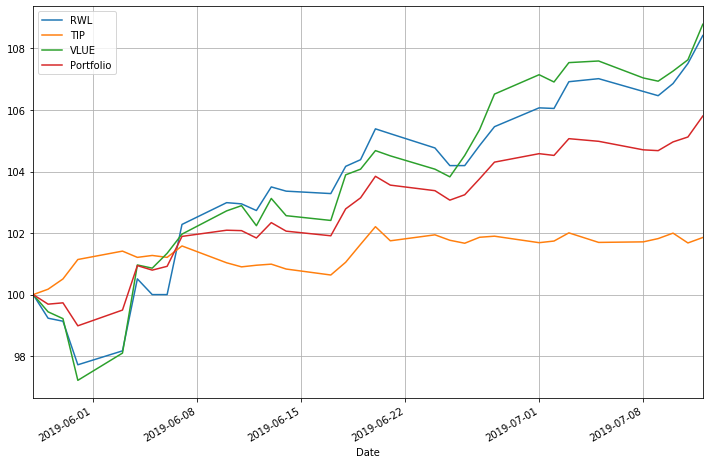

In [5]:
bounds = 0.8, 1.2
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(bounds=bounds)
quote.setup_mask(['RWL', 'TIP', 'VLUE'])
sd.update(quote.optimize_portfolio(bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote.setup_mask(['EDV', 'MTUM'])
ratio, mean, *_ = quote.find_optimal_ratio()
print(ratio, mean)
quote.graph(ratio)